<a href="https://colab.research.google.com/github/eranraz1/DeepLearning/blob/main/step2_2_bert_model_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
os.getcwd()

'/content'

In [4]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [7]:
data_raw = pd.read_csv('/content/sample_data/df_tagB.refine1.csv')
#data_raw = pd.read_csv('.//data//df_tagB.csv')
#data_raw = data_raw[data_raw.iloc[:,2:8].sum(axis=1)>0]

#df_tagB.csv



In [8]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 1636
Number of columns in data = 10


**Sample data:**


,Unnamed: 0,tag,city,review,Filthy,BadFood,ScaryMcDs,Cost,Service,Order_issue
0,0,"['SlowService', 'RudeService', 'BadFood']",New York,"mcdonalds on bowery has an ""oriental"" design. ...",0.0,1.0,0.0,0.0,1.0,0.0
1,1,['ScaryMcDs'],Las Vegas,"this place is quite sub par, even for a mcdona...",0.0,0.0,1.0,0.0,0.0,0.0
2,2,['na'],New York,i stopped by here in a hurry to get a quick bi...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,['na'],Houston,there are good and bad fast food restaurants a...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,['BadFood'],0Unknown,"i live very close, stop this morning at 5:50 a...",0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
data_raw.iloc[:, 3:]
data_raw = data_raw.iloc[:, 3:]
data_raw.shape
data_raw.head()

,review,Filthy,BadFood,ScaryMcDs,Cost,Service,Order_issue
0,"mcdonalds on bowery has an ""oriental"" design. ...",0.0,1.0,0.0,0.0,1.0,0.0
1,"this place is quite sub par, even for a mcdona...",0.0,0.0,1.0,0.0,0.0,0.0
2,i stopped by here in a hurry to get a quick bi...,0.0,0.0,0.0,0.0,0.0,0.0
3,there are good and bad fast food restaurants a...,0.0,0.0,0.0,0.0,0.0,0.0
4,"i live very close, stop this morning at 5:50 a...",0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
data = data_raw

In [13]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re
# import sys
# import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# def cleanHtml(sentence):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, ' ', str(sentence))
#     return cleantext
# def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
#     cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
#     cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
#     cleaned = cleaned.strip()
#     cleaned = cleaned.replace("\n"," ")
#     return cleaned
# def keepAlpha(sentence):
#     alpha_sent = ""
#     for word in sentence.split():
#         alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
#         alpha_sent += alpha_word
#         alpha_sent += " "
#     alpha_sent = alpha_sent.strip()
#     return alpha_sent
# data['review'] = data['review'].str.lower()
# data['review'] = data['review'].apply(cleanHtml)
# data['review'] = data['review'].apply(cleanPunc)
# data['review'] = data['review'].apply(keepAlpha)

In [14]:
# stemmer = SnowballStemmer("english")
# def stemming(sentence):
#     stemSentence = ""
#     for word in sentence.split():
#         stem = stemmer.stem(word)
#         stemSentence += stem
#         stemSentence += " "
#     stemSentence = stemSentence.strip()
#     return stemSentence
# data['review'] = data['review'].apply(stemming)

In [15]:
# data.head(5)

### set TF-IDF 

In [16]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(2,3), norm='l2')
# vectorizer.fit(train.review)
# vectorizer.fit(test.review)
# x_train = vectorizer.transform(train.review)
# y_train = train.drop(labels = ['id','review'], axis=1)
# x_test = vectorizer.transform(test.review)
# y_test = test.drop(labels = ['id','review'], axis=1)

In [17]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.multiclass import OneVsRestClassifier

In [18]:
# # Using pipeline for applying logistic regression and one vs rest classifier
# LogReg_pipeline = Pipeline([
#                 ('reg_clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])

In [19]:
# categories = data.columns[2:]

In [20]:
# for category in categories:
#     print('**Processing {} comments...**'.format(category))
    
#     # Training logistic regression model on train data
#     LogReg_pipeline.fit(x_train, train[category])
    
#     # calculating test accuracy
#     prediction = LogReg_pipeline.predict(x_test)
#     print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
#     print("\n")

In [21]:
######################################################################

In [22]:
! pip install pytorch-lightning

     |████████████████████████████████| 925 kB 5.4 MB/s 
     |████████████████████████████████| 636 kB 39.6 MB/s 
     |████████████████████████████████| 125 kB 45.5 MB/s 
     |████████████████████████████████| 829 kB 35.3 MB/s 
     |████████████████████████████████| 282 kB 45.5 MB/s 
     |████████████████████████████████| 1.3 MB 42.6 MB/s 
     |████████████████████████████████| 160 kB 46.2 MB/s 
     |████████████████████████████████| 271 kB 42.9 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=a4ad5f969b1949d0c3785e94672320cca2e8951700ceb37296fe4ecb849f864d
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0

In [23]:
! pip install transformers

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 895 kB 47.5 MB/s 
     |████████████████████████████████| 3.3 MB 38.4 MB/s 


In [24]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast as BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
import pytorch_lightning as pl
from pytorch_lightning.metrics.functional import accuracy, f1, auroc
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 42
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
pl.seed_everything(RANDOM_SEED)

Global seed set to 42


42

In [25]:
data.shape

(1636, 7)

In [26]:
df = data.copy()

In [27]:
df[df.iloc[:,2:8].sum(axis=1) > 0]

,review,Filthy,BadFood,ScaryMcDs,Cost,Service,Order_issue
0,"mcdonalds on bowery has an ""oriental"" design. ...",0.0,1.0,0.0,0.0,1.0,0.0
1,"this place is quite sub par, even for a mcdona...",0.0,0.0,1.0,0.0,0.0,0.0
4,"i live very close, stop this morning at 5:50 a...",0.0,1.0,0.0,0.0,0.0,0.0
5,"like all other mcdonald is, the service qualit...",0.0,0.0,0.0,0.0,1.0,0.0
8,with the amount of time it takes to get your o...,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1628,the drive thru line is always so long. they on...,0.0,0.0,0.0,0.0,1.0,0.0
1629,hands down worst mcdonald is we have ever visi...,0.0,1.0,0.0,0.0,1.0,0.0
1630,this mcdonald is has pretty poor customer serv...,0.0,0.0,0.0,0.0,1.0,0.0
1631,"this has to be the worst mcdonalds within a 3,...",0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
df.shape

(1636, 7)

In [29]:
import gc
del data
gc.collect()

206

In [30]:
train_df, val_df = train_test_split(df, test_size=0.25)
train_df.shape, val_df.shape

((1227, 7), (409, 7))

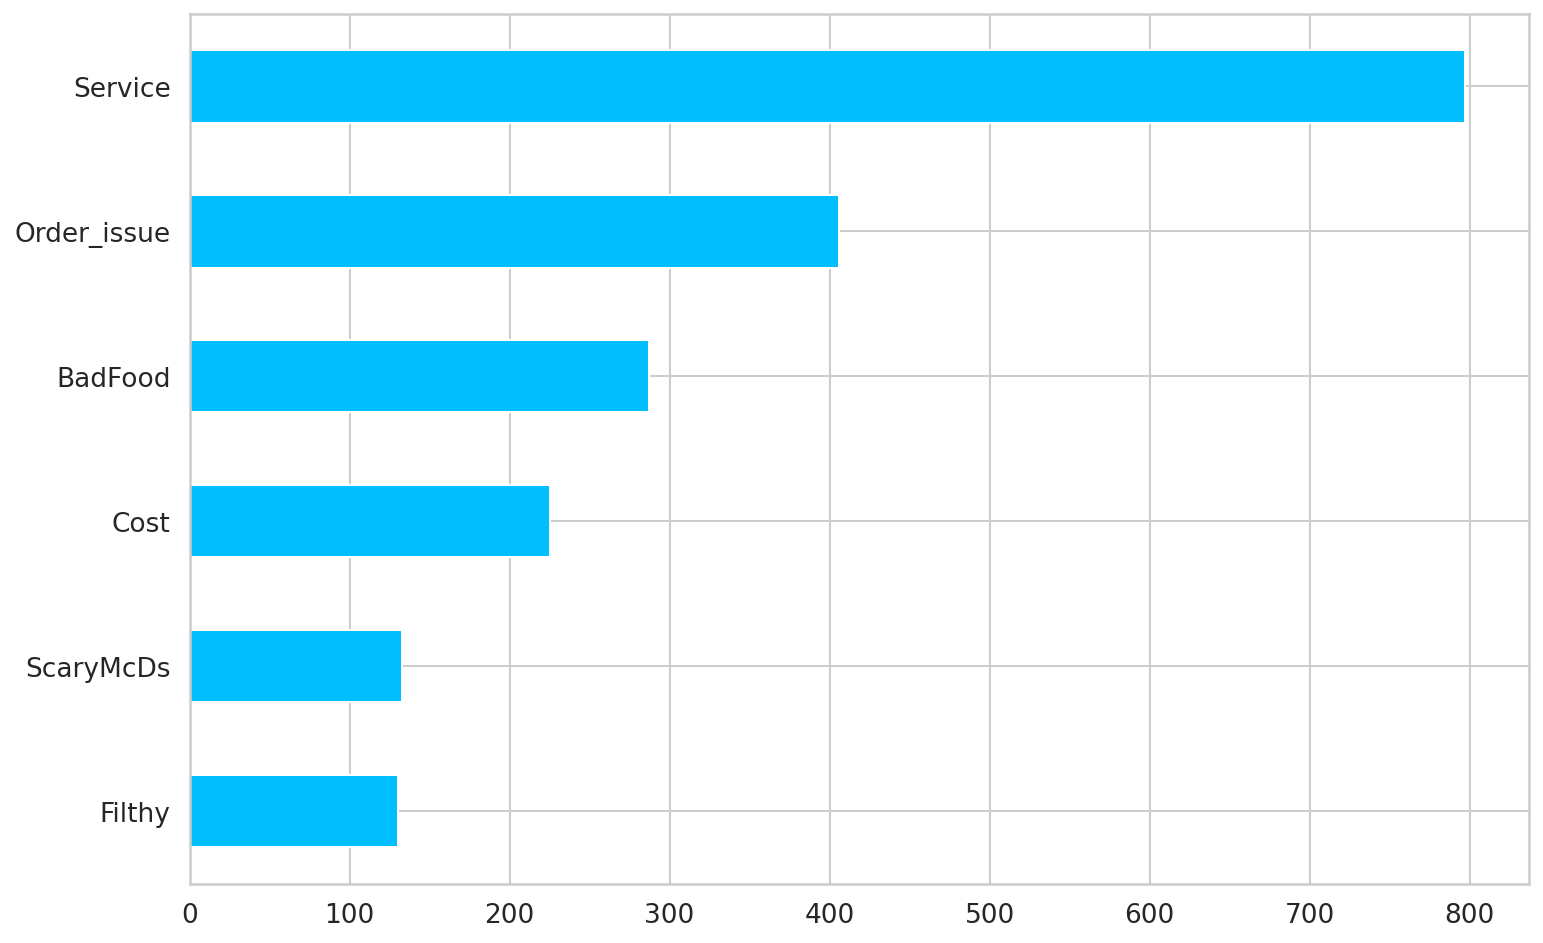

In [31]:
LABEL_COLUMNS = df.columns.tolist()[1:]
df[LABEL_COLUMNS].sum().sort_values().plot(kind="barh");

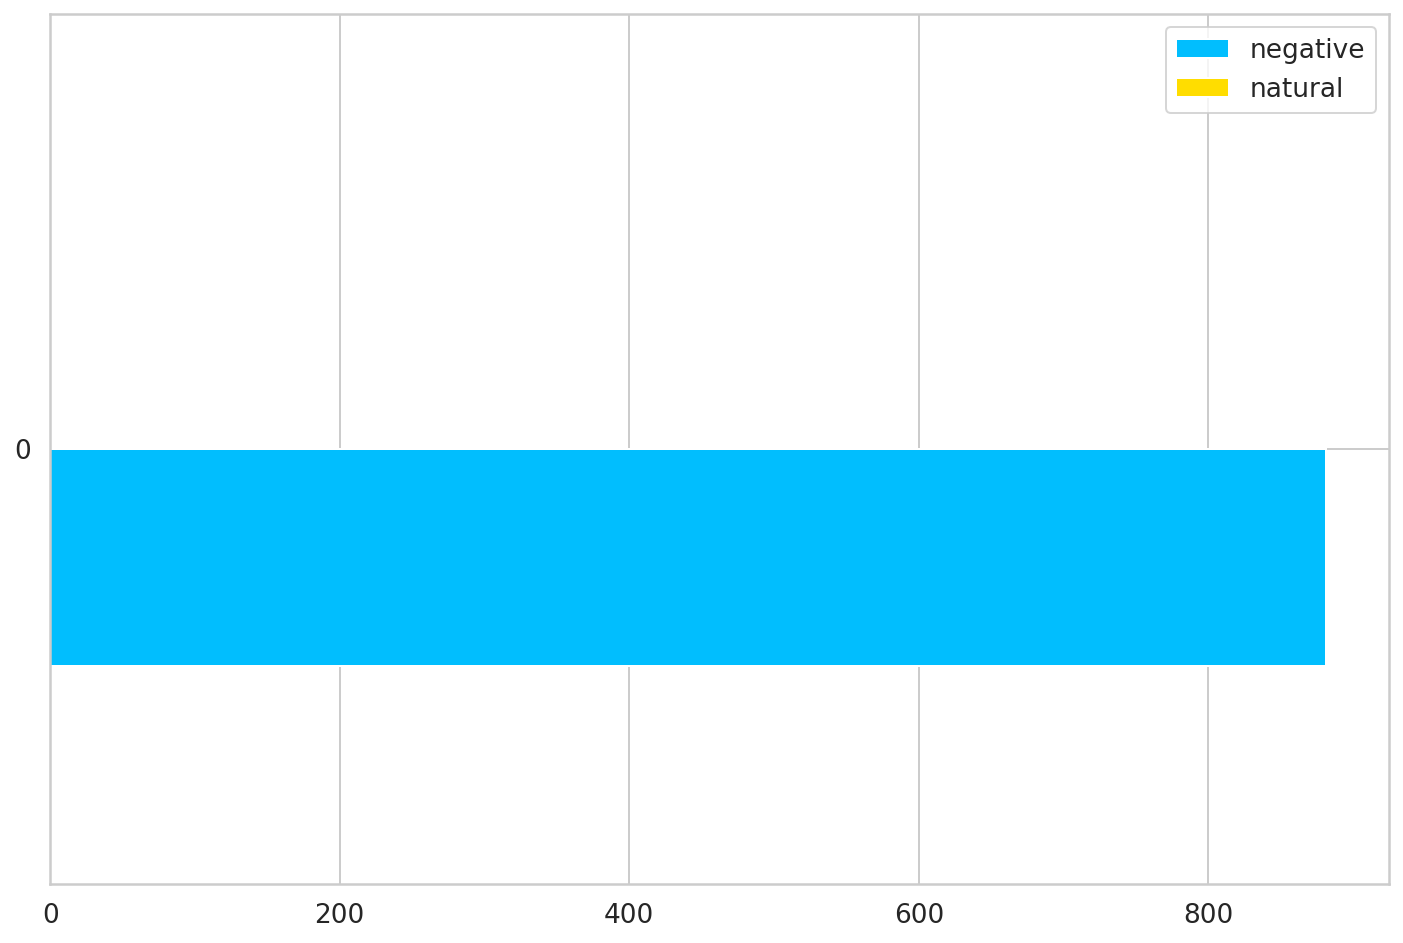

In [ ]:
train_negative = train_df[train_df[LABEL_COLUMNS].sum(axis=1) > 0]
train_positive = train_df[train_df[LABEL_COLUMNS].sum(axis=1) == 0]
pd.DataFrame(dict(
  negative=[len(train_negative)],
  natural=[len(train_positive)]
)).plot(kind='barh');

In [ ]:
train_df

,review,RudeService,OrderProblem,Filthy,SlowService,BadFood,ScaryMcDs,MissingFood,Cost
818,rain go mcdonald drive thru noteworthy point g...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
727,quite possibly slow mcdonald ever two drive th...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1083,sorry bother worst customer service ever recei...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,today break point long ago mcdonald revolution...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
453,slow mcdonald earth minutes get happy meals ma...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1044,mcdonalds blows relative already low initial e...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,want hour wait minutes mcnuggets get mcheated,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1130,time reason park bring order get annoy suck fo...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
860,mcdonald friends always go since close apartme...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [32]:
BERT_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_NAME)

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [33]:
LABEL_COLUMNS

['Filthy', 'BadFood', 'ScaryMcDs', 'Cost', 'Service', 'Order_issue']

In [34]:
sample_row = df.iloc[7]
sample_comment = sample_row.review
sample_labels = sample_row[LABEL_COLUMNS]
print(sample_comment)
print()
print(sample_labels.to_dict())

i do not understand why people have qualms with this mcdonald is. it is a mcdonald is. it is standard. their business model is standardization. ξit is "a-ok" just a plain old mcdonald is. never had anything crazy occur to me here!

{'Filthy': 0.0, 'BadFood': 0.0, 'ScaryMcDs': 0.0, 'Cost': 0.0, 'Service': 0.0, 'Order_issue': 0.0}


In [35]:
encoding = tokenizer.encode_plus(
  sample_comment,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [36]:
encoding["input_ids"].shape, encoding["attention_mask"].shape

(torch.Size([1, 512]), torch.Size([1, 512]))

In [37]:
encoding["input_ids"][0][0:40]

tensor([  101,   178,  1202,  1136,  2437,  1725,  1234,  1138,   186,  4746,
         4206,  1114,  1142,   182,  1665,  3842, 18728,  1110,   119,  1122,
         1110,   170,   182,  1665,  3842, 18728,  1110,   119,  1122,  1110,
         2530,   119,  1147,  1671,  2235,  1110,  2530,  2734,   119,   431])

In [38]:
encoding["attention_mask"][0][0:200]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
encoding["input_ids"].squeeze()[0:40]

tensor([  101,   178,  1202,  1136,  2437,  1725,  1234,  1138,   186,  4746,
         4206,  1114,  1142,   182,  1665,  3842, 18728,  1110,   119,  1122,
         1110,   170,   182,  1665,  3842, 18728,  1110,   119,  1122,  1110,
         2530,   119,  1147,  1671,  2235,  1110,  2530,  2734,   119,   431])

In [40]:
#inverse the tokenization and get back (kinda) the words from the token id

print(tokenizer.convert_ids_to_tokens(encoding["input_ids"].squeeze())[:40])

['[CLS]', 'i', 'do', 'not', 'understand', 'why', 'people', 'have', 'q', '##ual', '##ms', 'with', 'this', 'm', '##c', '##don', '##ald', 'is', '.', 'it', 'is', 'a', 'm', '##c', '##don', '##ald', 'is', '.', 'it', 'is', 'standard', '.', 'their', 'business', 'model', 'is', 'standard', '##ization', '.', 'ξ']


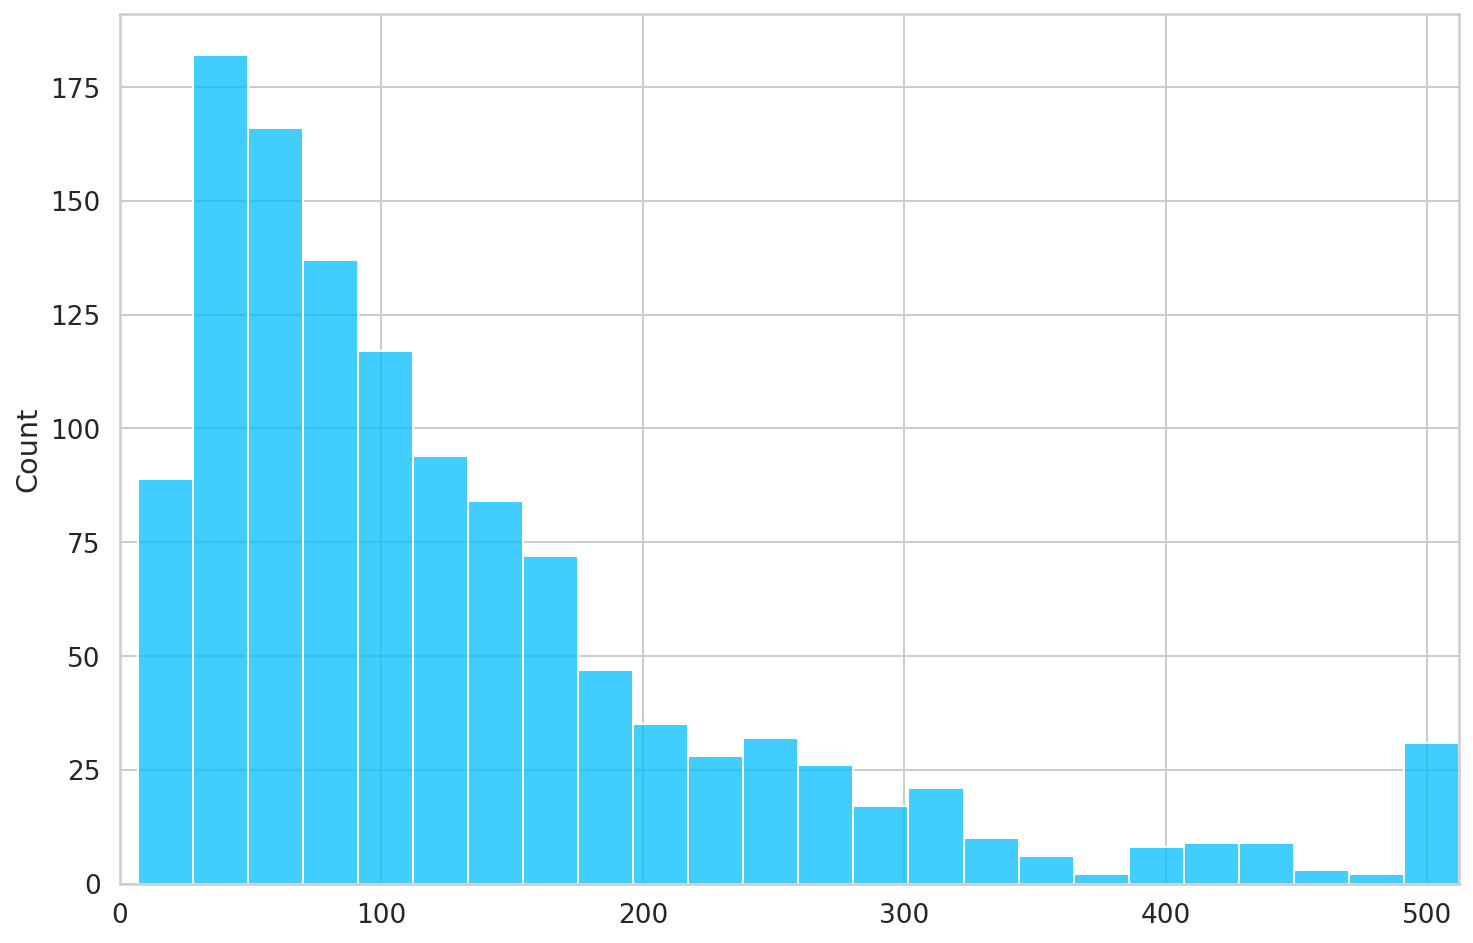

In [41]:
# We need to specify the maximum number of tokens when encoding (512 is the maximum we can do)

token_counts = []
for _, row in train_df.iterrows():
  token_count = len(tokenizer.encode(
    row["review"],
    max_length=512,
    truncation=True
  ))
  token_counts.append(token_count)
    
sns.histplot(token_counts)
plt.xlim([0, 512]);

In [ ]:
del token_counts, encoding
gc.collect()

10870

In [42]:
# we’ll stick with the limit of 512

MAX_TOKEN_COUNT = 350

In [43]:
# We’ll wrap the tokenization process in a PyTorch Dataset, along with converting the labels to tensors:

class ToxicCommentsDataset(Dataset):
  def __init__(self,data: pd.DataFrame,tokenizer: BertTokenizer,max_token_len: int = 128):
    self.tokenizer = tokenizer
    self.data = data
    self.max_token_len = max_token_len
  def __len__(self):
    return len(self.data)
  def __getitem__(self, index: int):
    data_row = self.data.iloc[index]
    review = data_row.review
    labels = data_row[LABEL_COLUMNS]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_token_len,
      return_token_type_ids=False,
      padding="max_length",
      truncation=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return dict(
      review=review,
      input_ids=encoding["input_ids"].flatten(),
      attention_mask=encoding["attention_mask"].flatten(),
      labels=torch.FloatTensor(labels)
    )

In [44]:
# Let’s have a look at a sample item from the dataset:
train_dataset = ToxicCommentsDataset(
  train_df,
  tokenizer,
  max_token_len=MAX_TOKEN_COUNT
)
sample_item = train_dataset[0]
sample_item.keys()


dict_keys(['review', 'input_ids', 'attention_mask', 'labels'])

In [ ]:
sample_item["review"]

'rain go mcdonald drive thru noteworthy point go thru drive thru rainy weather cover order speaker inadequate coverage order windows well order ten piece nugget combo large fries nuggets gristle several seem undercooked large dr pepper tasteless let syrup run notice drink left overall disappointed fry good though drive thru order taker courteous though give point'

In [ ]:
sample_item["labels"]

tensor([0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
sample_item["input_ids"].shape

torch.Size([512])

In [ ]:
# Let’s load the BERT model and pass a sample of batch data through

bert_model = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
sample_batch = next(iter(DataLoader(train_dataset, batch_size=8, num_workers=4, pin_memory= True)))
sample_batch["input_ids"].shape, sample_batch["attention_mask"].shape

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggeste

(torch.Size([8, 512]), torch.Size([8, 512]))

In [ ]:
output = bert_model(sample_batch["input_ids"], sample_batch["attention_mask"])

In [ ]:
output.last_hidden_state.shape, output.pooler_output.shape

(torch.Size([8, 512, 768]), torch.Size([8, 768]))

In [ ]:
# Note! - The 768 dimension comes from the BERT hidden size
bert_model.config.hidden_size
gc.collect()

365

In [45]:
# We’ll wrap our custom dataset into a LightningDataModule:
# ToxicCommentDataModule - encapsulates all data loading logic and returns the necessary data loaders

class ToxicCommentDataModule(pl.LightningDataModule):
  def __init__(self, train_df, test_df, tokenizer, batch_size=8, max_token_len=128):
    super().__init__()
    self.batch_size = batch_size
    self.train_df = train_df
    self.test_df = test_df
    self.tokenizer = tokenizer
    self.max_token_len = max_token_len
  def setup(self, stage=None):
    self.train_dataset = ToxicCommentsDataset(
      self.train_df,
      self.tokenizer,
      self.max_token_len
    )
    self.test_dataset = ToxicCommentsDataset(
      self.test_df,
      self.tokenizer,
      self.max_token_len
    )
  def train_dataloader(self):
    return DataLoader(
      self.train_dataset,
      batch_size=self.batch_size,
      shuffle=True,
      num_workers=4, pin_memory= True
    )
  def val_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=4 ,pin_memory= True
    )
  def test_dataloader(self):
    return DataLoader(
      self.test_dataset,
      batch_size=self.batch_size,
      num_workers=4 , pin_memory= True
    )


In [46]:
# create an instance of our data module

N_EPOCHS = 5
BATCH_SIZE = 10
data_module = ToxicCommentDataModule(
  train_df,
  val_df,
  tokenizer,
  batch_size=BATCH_SIZE,
  max_token_len=MAX_TOKEN_COUNT
)


## Model
**model** will use a pre-trained BertModel and a linear layer to convert the BERT representation to a classification task.
We’ll pack everything in a LightningModule:

**points of interest** - are the way we configure the optimizers and calculating the area under ROC

In [47]:
class ToxicCommentTagger(pl.LightningModule):
  def __init__(self, n_classes: int, n_training_steps=None, n_warmup_steps=None):
    super().__init__()
    self.bert = BertModel.from_pretrained(BERT_MODEL_NAME, return_dict=True)
    self.classifier = nn.Linear(self.bert.config.hidden_size, n_classes)
    self.n_training_steps = n_training_steps
    self.n_warmup_steps = n_warmup_steps
    self.criterion = nn.BCELoss()
  def forward(self, input_ids, attention_mask, labels=None):
    output = self.bert(input_ids, attention_mask=attention_mask)
    output = self.classifier(output.pooler_output)
    output = torch.sigmoid(output)
    loss = 0
    if labels is not None:
        loss = self.criterion(output, labels)
    return loss, output
  def training_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("train_loss", loss, prog_bar=True, logger=True)
    return {"loss": loss, "predictions": outputs, "labels": labels}
  def validation_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss
  def test_step(self, batch, batch_idx):
    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    labels = batch["labels"]
    loss, outputs = self(input_ids, attention_mask, labels)
    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss
  def training_epoch_end(self, outputs):
    labels = []
    predictions = []
    for output in outputs:
      for out_labels in output["labels"].detach().cpu():
        labels.append(out_labels)
      for out_predictions in output["predictions"].detach().cpu():
        predictions.append(out_predictions)
    labels = torch.stack(labels).int()
    predictions = torch.stack(predictions)
    for i, name in enumerate(LABEL_COLUMNS):
      class_roc_auc = auroc(predictions[:, i], labels[:, i])
      self.logger.experiment.add_scalar(f"{name}_roc_auc/Train", class_roc_auc, self.current_epoch)
  def configure_optimizers(self):
    optimizer = AdamW(self.parameters(), lr=2e-5)
    scheduler = get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps=self.n_warmup_steps,
      num_training_steps=self.n_training_steps
    )
    return dict(
      optimizer=optimizer,
      lr_scheduler=dict(
        scheduler=scheduler,
        interval='step'
      )
    )

**Optimizer schedule**r -The job of a scheduler is to change the learning rate of the optimizer during training. This might lead to better performance of our model. We’ll use the get_linear_schedule_with_warmup.

Linear learning rate scheduling over training steps


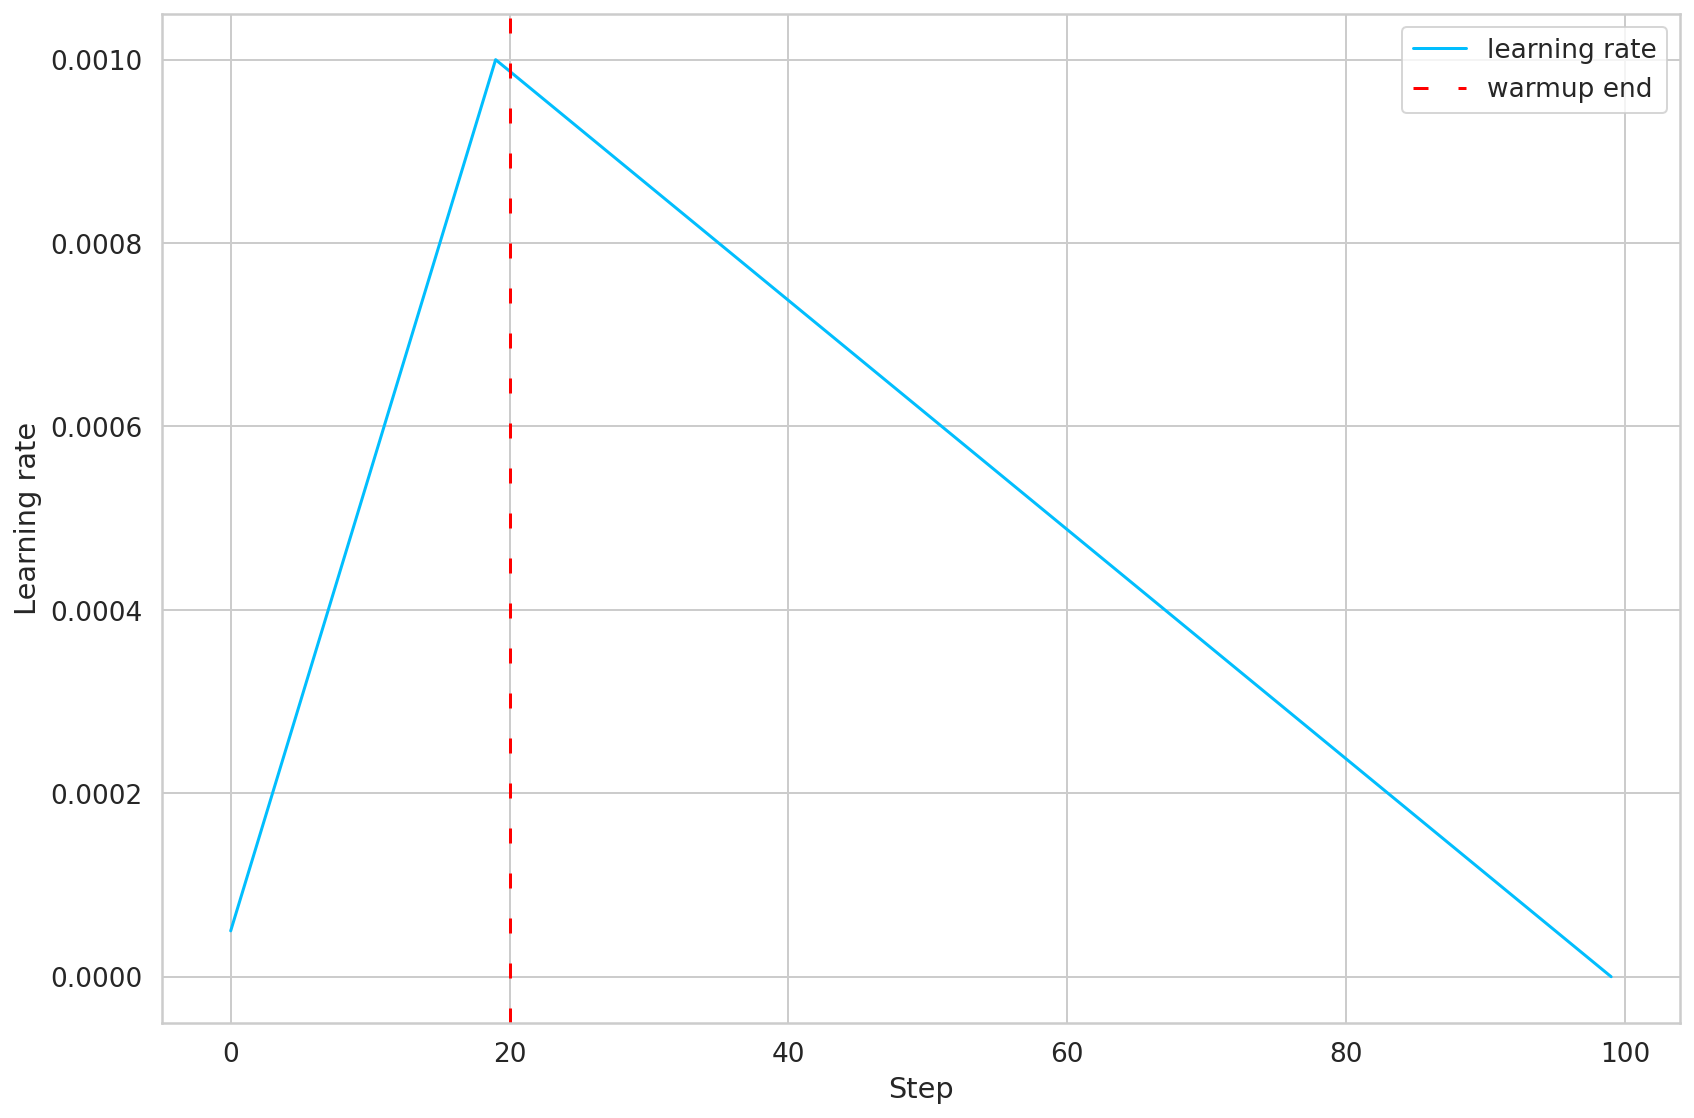

In [48]:
#  simple example to make things clearer

dummy_model = nn.Linear(2, 1)
optimizer = AdamW(params=dummy_model.parameters(), lr=0.001)
warmup_steps = 20
total_training_steps = 100
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=warmup_steps,
  num_training_steps=total_training_steps
)
learning_rate_history = []
for step in range(total_training_steps):
  optimizer.step()
  scheduler.step()
  learning_rate_history.append(optimizer.param_groups[0]['lr'])
plt.plot(learning_rate_history, label="learning rate")
plt.axvline(x=warmup_steps, color="red", linestyle=(0, (5, 10)), label="warmup end")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Learning rate")
plt.tight_layout();

print('Linear learning rate scheduling over training steps')

To use the scheduler, we need to calculate the number of training and warm-up steps. The number of training steps per epoch is equal to number of training examples / batch size. The number of total training steps is training steps per epoch * number of epochs

We’ll use a fifth of the training steps for a warm-up:

In [52]:
steps_per_epoch=len(train_df) // BATCH_SIZE
total_training_steps = steps_per_epoch * N_EPOCHS

warmup_steps = total_training_steps // 15
warmup_steps, total_training_steps

(40, 610)

In [53]:
# steps_per_epoch= steps_per_epoch//2


In [54]:
# create an instance of the model
model = ToxicCommentTagger(
  n_classes=len(LABEL_COLUMNS),
  n_warmup_steps=warmup_steps,
  n_training_steps=total_training_steps
)


Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Evaluation
We’ll use **Binary Cross Entropy** to measure the error for each label. PyTorch has **BCELoss**, which we’re going to combine with a sigmoid function (as we did in the model implementation)

In [55]:
# example - Loss Calc

criterion = nn.BCELoss()
prediction = torch.FloatTensor([10.95873564, 1.07321467, 1.58524066, 0.03839076, 15.72987556, 1.09513213])

labels = torch.FloatTensor([1., 0., 0., 0., 1., 0.])

print(torch.sigmoid(prediction))
print(criterion(torch.sigmoid(prediction), labels))

tensor([1.0000, 0.7452, 0.8299, 0.5096, 1.0000, 0.7493])
tensor(0.8725)


In [56]:
# # calculate the loss of the prediction

# _, predictions = model(sample_batch["input_ids"], sample_batch["attention_mask"])
# predictions

In [57]:
# criterion(predictions, sample_batch["labels"])

In [58]:
del sample_batch
gc.collect()

NameError: ignored

### ROC Curve
The area under the Receiver operating characteristic (ROC) for each tag. ROC is created by plotting the True Positive Rate (TPR) vs False Positive Rate (FPR)

![image.png](attachment:2bd8a67f-1611-4932-8b67-af1438a334c8.png)

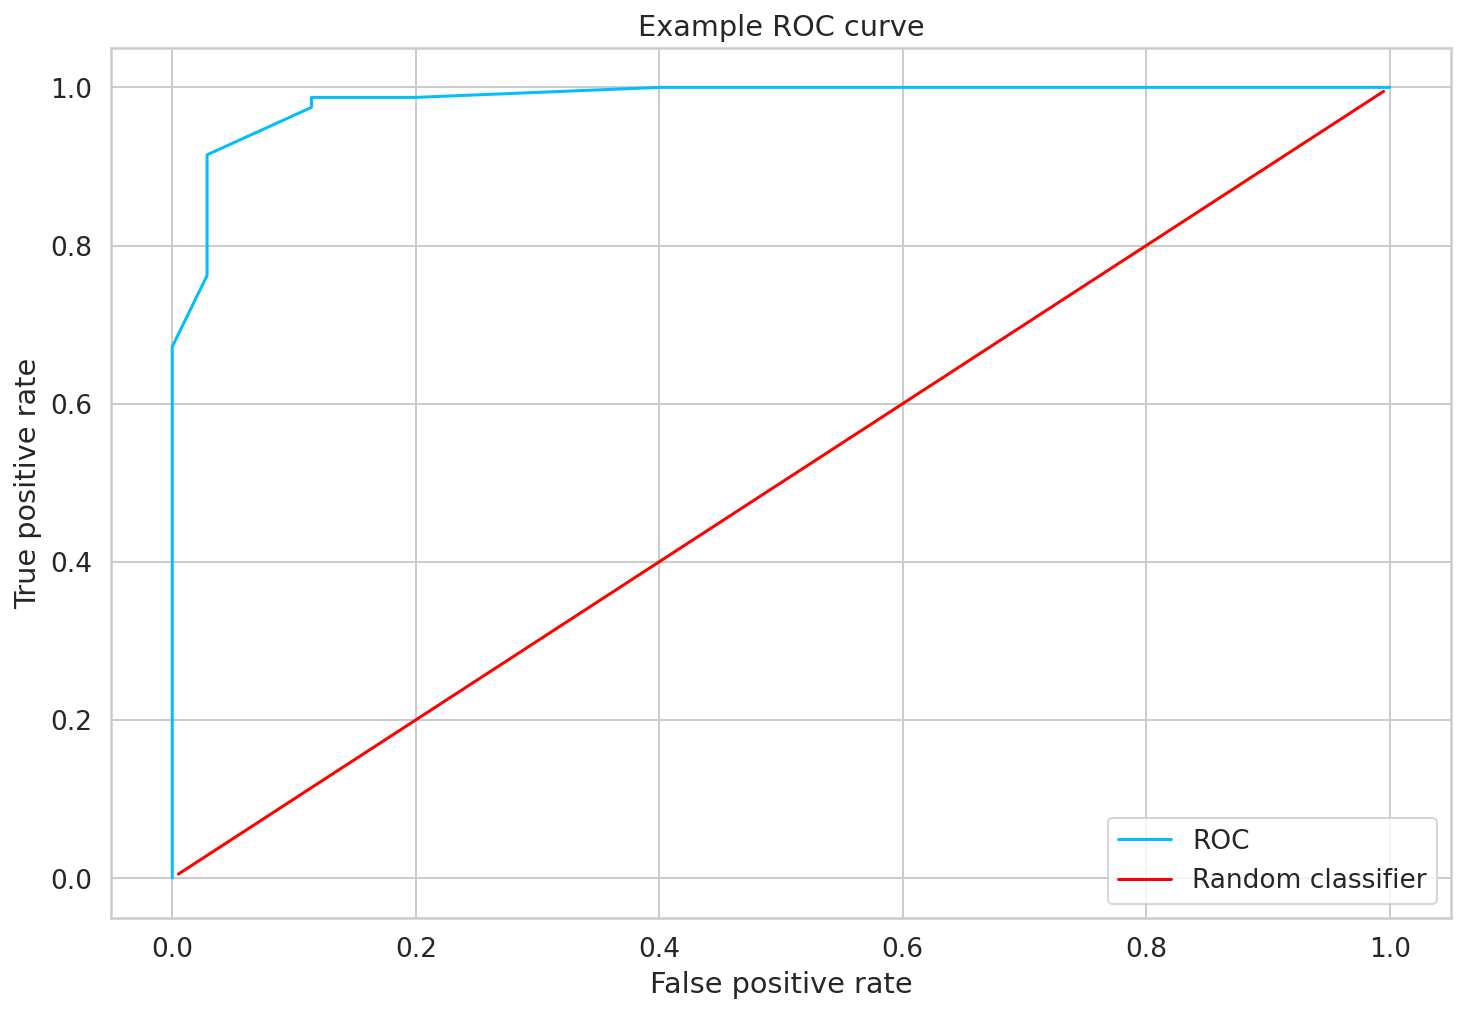

Example ROC value of a trained classifier vs random classifier


In [59]:
from sklearn import metrics
fpr = [0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.11428571, 0.11428571, 0.2       , 0.4       , 1.        ]
tpr = [0.        , 0.01265823, 0.67202532, 0.76202532, 0.91468354,
       0.97468354, 0.98734177, 0.98734177, 1.        , 1.        ]
_, ax = plt.subplots()
ax.plot(fpr, tpr, label="ROC")
ax.plot([0.05, 0.95], [0.05, 0.95], transform=ax.transAxes, label="Random classifier", color="red")
ax.legend(loc=4)
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")
ax.set_title("Example ROC curve")
plt.show();

print('Example ROC value of a trained classifier vs random classifier')

### Training
we'll use at least 3 components - **Checkpointing** that saves the best model (based on validation loss):

In [60]:
checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="best-checkpoint",
    save_top_k=1,
    verbose=True,
    monitor="val_loss",
    mode="min")

In [61]:
# Log the progress in TensorBoard:

logger = TensorBoardLogger("lightning_logs", name="toxic-comments")

In [62]:
# And early stopping triggers when the loss hasn’t improved for the last 2 epochs 
#(you might want to remove/reconsider this when training on real-world projects):
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)



In [63]:
# start the training process:

trainer = pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback, early_stopping_callback],
    max_epochs= N_EPOCHS,
    gpus=1,
    progress_bar_refresh_rate=30)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [ ]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

print(alldfs) 

['_22', '_28', '_5', '_6', 'data_raw', 'df', 'train_df', 'train_negative', 'train_positive', 'val_df']


In [ ]:
del alldfs
gc.collect()

176

In [ ]:
# del _33, _34, _35, _43,_56, _57
# gc.collect()

In [64]:
trainer.fit(model, data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type      | Params
-----------------------------------------
0 | bert       | BertModel | 108 M 
1 | classifier | Linear    | 4.6 K 
2 | criterion  | BCELoss   | 0     
-----------------------------------------
108 M     Trainable params
0         Non-trainable params
108 M     Total params
433.260   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Global seed set to 42


Training: -1it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/logger_connector/result.py:406: LightningDeprecationWarning: One of the returned values {'predictions', 'labels'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  f"One of the returned values {set(extra.keys())} has a `grad_fn`. We will detach it automatically"


Validating: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `auroc` was deprecated since v1.3.0 in favor of `torchmetrics.functional.classification.auroc.auroc`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)
/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: `pos_label` automatically set 1.
  warnings.warn(*args, **kwargs)
Epoch 0, global step 122: val_loss reached 0.41880 (best 0.41880), saving model to "/content/checkpoints/best-checkpoint.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 1, global step 245: val_loss reached 0.31136 (best 0.31136), saving model to "/content/checkpoints/best-checkpoint.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 368: val_loss reached 0.25506 (best 0.25506), saving model to "/content/checkpoints/best-checkpoint.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 491: val_loss reached 0.23740 (best 0.23740), saving model to "/content/checkpoints/best-checkpoint.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 614: val_loss reached 0.23181 (best 0.23181), saving model to "/content/checkpoints/best-checkpoint.ckpt" as top 1


In [65]:
trainer.test()
gc.collect()

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:424: LightningDeprecationWarning: DataModule.prepare_data has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.prepare_data.
  f"DataModule.{name} has already been called, so it will not be called again. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.23180721700191498}
--------------------------------------------------------------------------------


32608

**Predictions**
mall sample of predictions after the training is complete. This builds intuition about the quality of the predictions (qualitative evaluation).

Loading the best version (according to the validation loss) of our model:

In [67]:
trained_model = ToxicCommentTagger.load_from_checkpoint(
  trainer.checkpoint_callback.best_model_path,
  n_classes=len(LABEL_COLUMNS)
)
trained_model.eval()
trained_model.freeze()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [68]:
test_comment = "very ugly and rude service. mck was very dirty...very very Filthy dirty thru no service"
encoding = tokenizer.encode_plus(
  test_comment,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
test_prediction = test_prediction.flatten().numpy()
for label, prediction in zip(LABEL_COLUMNS, test_prediction):
  print(f"{label}: {prediction}")

Filthy: 0.5499488115310669
BadFood: 0.16847604513168335
ScaryMcDs: 0.24505358934402466
Cost: 0.04900505766272545
Service: 0.5264751315116882
Order_issue: 0.05282144248485565


![image.png](attachment:9a2047f9-f854-4738-84d3-ca269fbe0bc7.png)

In [69]:
THRESHOLD = 0.5
test_comment = "You are such a loser! cost alot . very expensive"
encoding = tokenizer.encode_plus(
  test_comment,
  add_special_tokens=True,
  max_length=512,
  return_token_type_ids=False,
  padding="max_length",
  return_attention_mask=True,
  return_tensors='pt',
)
_, test_prediction = trained_model(encoding["input_ids"], encoding["attention_mask"])
test_prediction = test_prediction.flatten().numpy()
for label, prediction in zip(LABEL_COLUMNS, test_prediction):
  if prediction < THRESHOLD:
    continue
  print(f"{label}: {prediction}")

Cost: 0.8741320371627808


### Evaluation

In [70]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
trained_model = trained_model.to(device)
val_dataset = ToxicCommentsDataset(
  val_df,
  tokenizer,
  max_token_len=MAX_TOKEN_COUNT
)
predictions = []
labels = []
for item in tqdm(val_dataset):
  _, prediction = trained_model(
    item["input_ids"].unsqueeze(dim=0).to(device),
    item["attention_mask"].unsqueeze(dim=0).to(device)
  )
  predictions.append(prediction.flatten())
  labels.append(item["labels"].int())
predictions = torch.stack(predictions).detach().cpu()
labels = torch.stack(labels).detach().cpu()

  0%|          | 0/409 [00:00<?, ?it/s]

In [71]:
accuracy(predictions, labels, threshold=THRESHOLD)

/usr/local/lib/python3.7/dist-packages/deprecate/deprecation.py:115: LightningDeprecationWarning: The `accuracy` was deprecated since v1.3.0 in favor of `torchmetrics.functional.classification.accuracy.accuracy`. It will be removed in v1.5.0.
  stream(template_mgs % msg_args)


tensor(0.9156)

check the **ROC** for each tag



In [72]:
print("AUROC per tag")
for i, name in enumerate(LABEL_COLUMNS):
  tag_auroc = auroc(predictions[:, i], labels[:, i], pos_label=1)
  print(f"{name}: {tag_auroc}")

AUROC per tag
Filthy: 0.9371462464332581
BadFood: 0.8826379776000977
ScaryMcDs: 0.7994555234909058
Cost: 0.9970320463180542
Service: 0.9259792566299438
Order_issue: 0.9359007477760315


Check the **classification report** for each class. To make this work, we must apply thresholding to the predictions

In [73]:
gc.collect()

y_pred = predictions.numpy()
y_true = labels.numpy()
upper, lower = 1, 0
y_pred = np.where(y_pred > THRESHOLD, upper, lower)
print(classification_report(
  y_true,
  y_pred,
  target_names=LABEL_COLUMNS,
  zero_division=0
))

              precision    recall  f1-score   support

      Filthy       1.00      0.39      0.56        36
     BadFood       0.69      0.61      0.65        70
   ScaryMcDs       0.50      0.03      0.06        29
        Cost       0.96      0.94      0.95        53
     Service       0.88      0.81      0.84       217
 Order_issue       0.84      0.75      0.80       101

   micro avg       0.86      0.71      0.78       506
   macro avg       0.81      0.59      0.64       506
weighted avg       0.84      0.71      0.75       506
 samples avg       0.65      0.61      0.62       506



![image.png](attachment:11fbcf9a-34cb-41fa-abca-e489bf49334f.png)

In [ ]:
print('finish')

finish


In [ ]:
device = 'cuda'